# Introduction

In this notebook, I will perform Exploratory Data Analysis (EDA) on video games sales from 2000 - 2020 and Example of Deep-Dive Questions.

Steps: 

- Missing value check and handling
- Duplicated value check and handling
- Filtering Data
- Univariate analysis
- Bivariate analysis
- Answering Deep-Dive Questions

## Deep-Dive Questions
1. What are Top 5 genre with the most Global Sales?
2. Which Platform contributed the most global sales?
3. How is yearly sales profile (time series)?

## Feature in Dataset

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [2]:
games = pd.read_csv('vgsales.csv')
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Missing Values & Duplicated Data Check

In [4]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

There's 271 missing values in `Year` column and 58 missing values in `Publisher` column

In [5]:
games.duplicated().sum()

0

There's no duplicated value in this data

## Handling Missing Value

In [6]:
games = games.dropna()

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
games.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

This data no longer has missing value anymore, but as a consequence the number of indexes in this data is decereases from 16598 to 16291.

In [9]:
games['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

## Filtering Data (Year Start From 2010)

In [10]:
games_20s = games[games['Year']>1999].reset_index(drop = True)

In [11]:
games_20s

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
14312,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
14313,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
14314,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
14315,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
games_20s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14317 entries, 0 to 14316
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          14317 non-null  int64  
 1   Name          14317 non-null  object 
 2   Platform      14317 non-null  object 
 3   Year          14317 non-null  float64
 4   Genre         14317 non-null  object 
 5   Publisher     14317 non-null  object 
 6   NA_Sales      14317 non-null  float64
 7   EU_Sales      14317 non-null  float64
 8   JP_Sales      14317 non-null  float64
 9   Other_Sales   14317 non-null  float64
 10  Global_Sales  14317 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


## Data Understanding

In [13]:
games_20s.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [14]:
categoricals = ['Name','Platform','Genre','Publisher']

numericals = ['Rank','Year','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [15]:
games_20s[numericals].describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,14317.000000,14317.000000,14317.000000,14317.000000,14317.000000,14317.000000,14317.000000
mean,8534.574701,2007.946916,0.245574,0.146163,0.056538,0.051293,0.499859
std,4787.655060,4.049392,0.717393,0.516152,0.250117,0.200668,1.473073
min,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4399.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8632.000000,2008.000000,0.080000,0.020000,0.000000,0.010000,0.160000
75%,12708.000000,2011.000000,0.230000,0.110000,0.030000,0.040000,0.450000
max,16600.000000,2020.000000,41.490000,29.020000,6.500000,10.570000,82.740000


Observation:
- Overall, the minimum and maximum values make sense for each column
- `Year` and `Rank`are discrete values, no need to conclude its simmetricity either.

In [16]:
games_20s[categoricals].describe()

,Name,Platform,Genre,Publisher
count,14317,14317,14317,14317
unique,9600,20,12,457
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2130,3023,1231


## Univariate Analysis

### - Inspect Numerical Column Distribution

/Users/intannurhani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/intannurhani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/intannurhani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

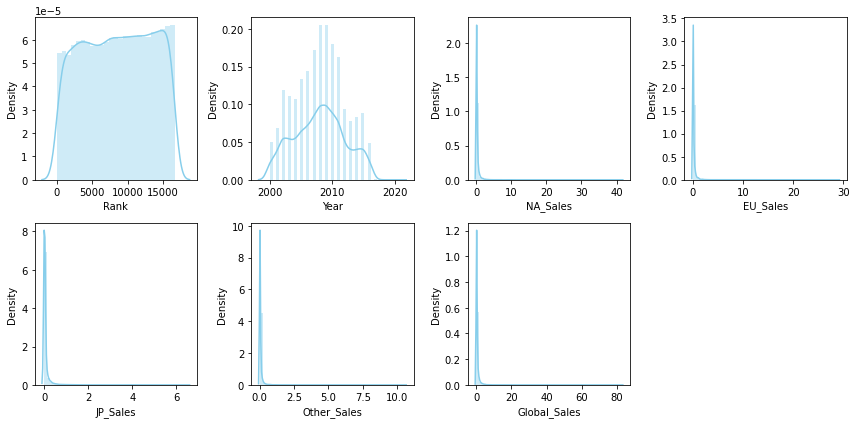

In [17]:
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=games_20s[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

All Numericals data is positively skewed 

### - Inspect Categorical Column Distribution

<AxesSubplot:xlabel='count', ylabel='Genre'>

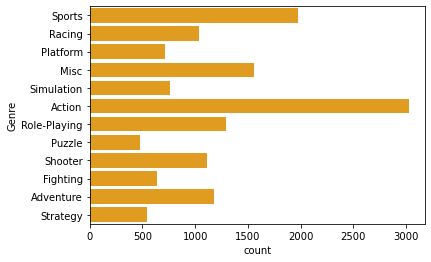

In [18]:
sns.countplot(y='Genre', data = games_20s, color = 'orange')

<AxesSubplot:xlabel='count', ylabel='Platform'>

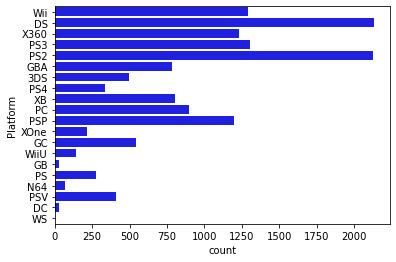

In [22]:
sns.countplot(y='Platform', data = games_20s, color = 'blue')

## Bivariate Analysis

### - Heatmap Correlation

<AxesSubplot:>

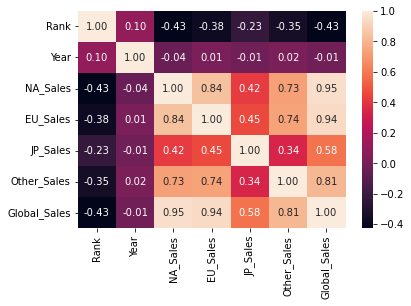

In [47]:
correlation = games_20s.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

- `NA_Sales`,`EU_Sales`,and ``Other_Sales` have high correlation with `Global_Sales` because `Global_Sales` is the sum of all sales 
- `EU_Sales` and `NA_Sales`are highlly corelated each other

## EDA Questions

### 1. Top 5 Genre with Most Total Sales

In [20]:
top5_genre = (games_20s
            .groupby('Genre')
            .agg(total_sales =('Global_Sales','sum'))
            .reset_index()
            .sort_values('total_sales',ascending=False)
            .head(10)
            )
top5_genre

,Genre,total_sales
0,Action,1532.37
10,Sports,1130.39
8,Shooter,897.46
7,Role-Playing,724.06
3,Misc,717.88
6,Racing,564.26
4,Platform,497.95
9,Simulation,337.42
2,Fighting,313.36
1,Adventure,185.00


Top 5 of Total Sales are Games wih Genre `Action`,`Shooter`,`Sports`,`Role-Playing`, and `Misc`

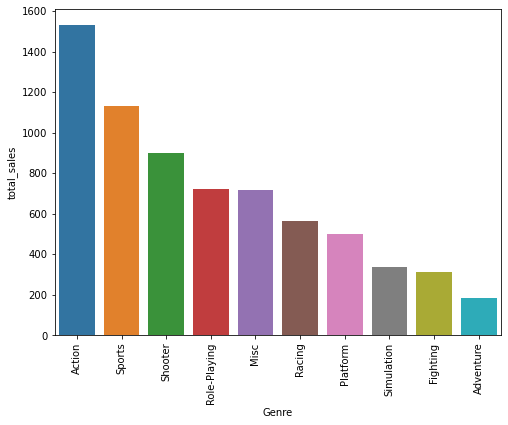

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data=top5_genre, x='Genre', y='total_sales')
plt.xticks(rotation=90)
plt.show()

### 2. Platform with Most Contribution in the last decade

In [27]:
games_decade=games_20s[games_20s['Year']>2009].reset_index(drop = True)

In [28]:
games_decade

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
4,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...,...
5129,16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
5130,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
5131,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
5132,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


In [30]:
least_platform = (games_decade
            .groupby('Platform')
            .agg(total_sales =('Global_Sales','sum'))
            .reset_index()
            .sort_values('total_sales',ascending=False)
            .head(10)
            )
least_platform

,Platform,total_sales
4,PS3,602.44
10,X360,556.95
5,PS4,278.10
0,3DS,246.27
8,Wii,232.33
11,XOne,141.06
1,DS,129.64
2,PC,119.78
9,WiiU,81.86
6,PSP,64.27


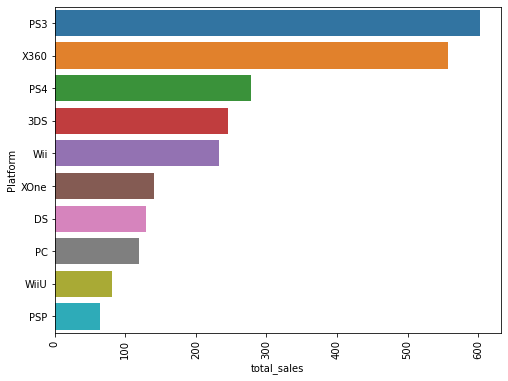

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(data=least_platform, x='total_sales', y='Platform')
plt.xticks(rotation=90)
plt.show()

### 3. Yearly global sales profile (time series)

In [50]:
year_sale = (games_20s
            .groupby('Year')
            .agg(total_sales =('Global_Sales','sum'))
            .reset_index()
            .sort_values('total_sales',ascending=False)
            )


year_sale['Year'] = year_sale['Year'].astype(str) 
year_sale

,Year,total_sales
8,2008.0,678.90
9,2009.0,667.30
7,2007.0,609.92
10,2010.0,600.29
6,2006.0,521.04
11,2011.0,515.80
5,2005.0,458.51
4,2004.0,414.01
2,2002.0,395.52
13,2013.0,368.11


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

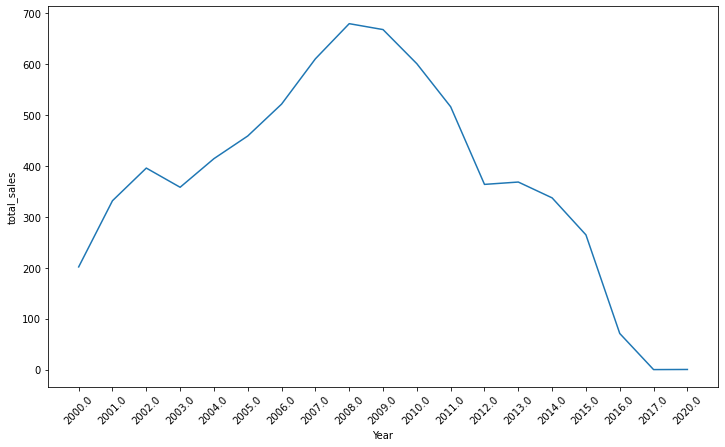

In [49]:
plt.figure(figsize=(12,7))
sns.lineplot(data=year_sale,
             x='Year',
             y='total_sales')
plt.xticks(rotation=45)

highest sales is in 2008